## Chapter 12: Introduction to nonlinear learning

In [1]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import nonlinear_superlearn_library as nonlib


# demos for this notebook
regress_plotter = nonlib.nonlinear_regression_demos_multiple_panels
classif_plotter = nonlib.nonlinear_classification_visualizer_multiple_panels
static_plotter = optlib.static_plotter.Visualizer()
basic_runner = nonlib.basic_runner
classif_plotter_crossval = nonlib.crossval_classification_visualizer
datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'

# import autograd functionality to bulid function's properly for optimizers
import autograd.numpy as np

# import timer
from datetime import datetime 
import copy
import math
import pickle 

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>


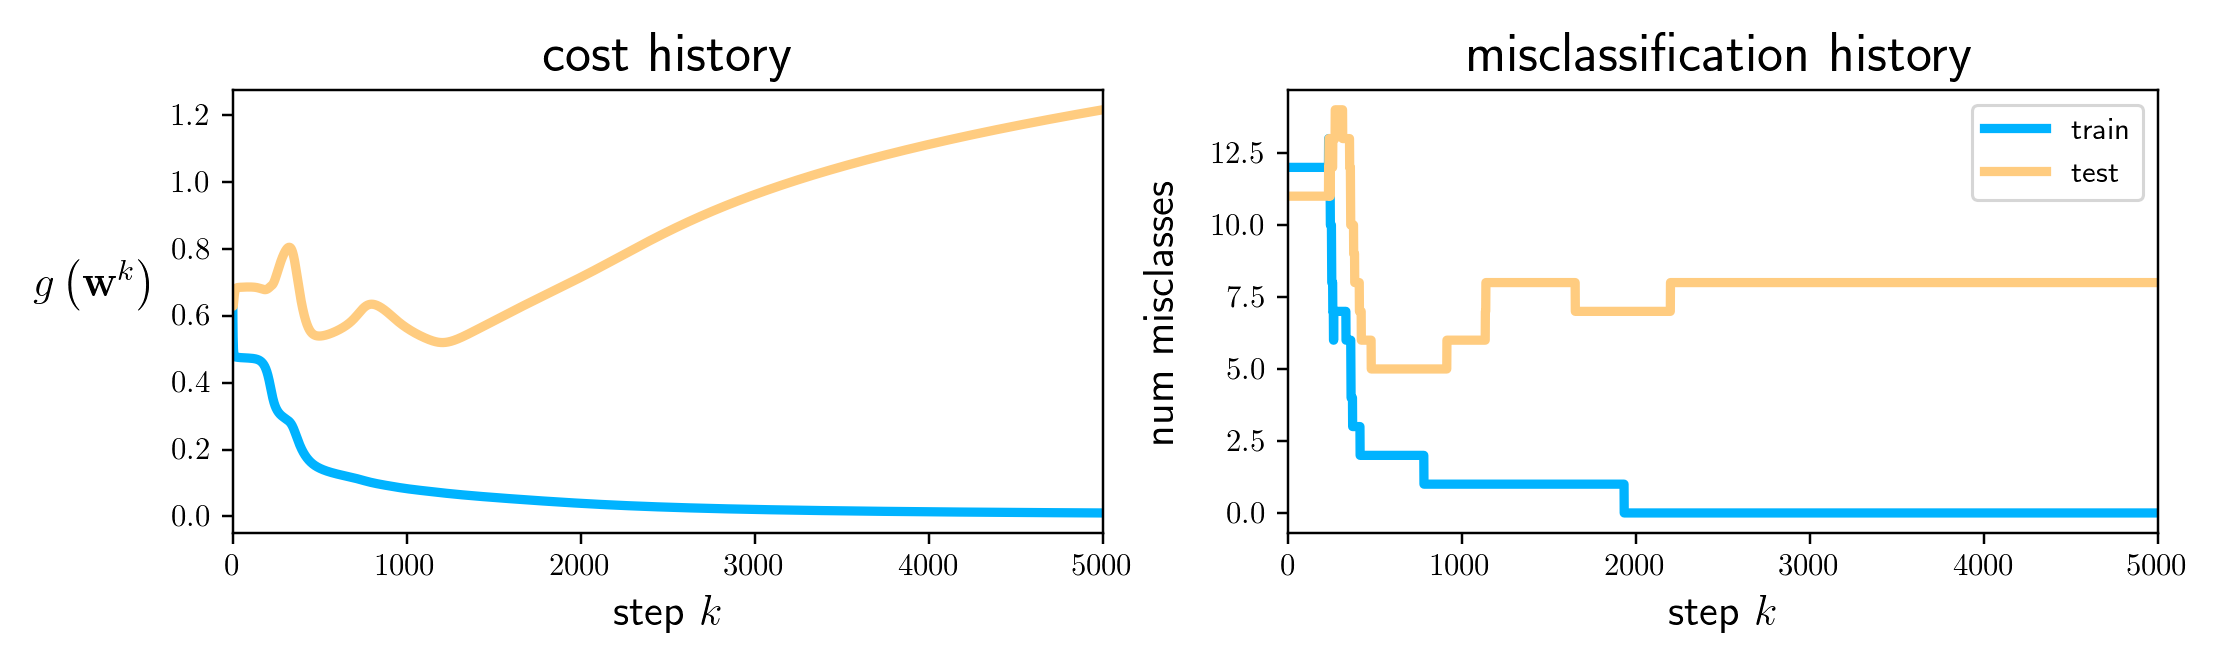

In [2]:
## This code cell will not be shown in the HTML version of this notebook
name = datapath + 'early_stopping_weights.p'
init_weights = pickle.load( open(name, "rb" ) )

name = datapath + 'early_stop_test_data.p'
test_data = pickle.load( open(name, "rb" ) )
x_valid =  test_data[:-1,:]
y_valid = test_data[-1:,:] 

name = datapath + 'early_stop_train_data.p'
train_data = pickle.load( open(name, "rb" ) )
x_train =  train_data[:-1,:]
y_train = train_data[-1:,:] 

# load in data
csvname = datapath + 'small_circle_data.csv'

data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# import the v1 library
mylib1 = nonlib.early_stop_lib.superlearn_setup.Setup(x,y)

# choose features
layer_sizes = [2,5,1]

# choose features
mylib1.choose_features(name = 'multilayer_perceptron',layer_sizes = layer_sizes,activation = 'tanh')

# choose normalizer
mylib1.choose_normalizer(name = 'standard')

# split into training and testing sets
mylib1.make_train_valid_split(train_portion = 0.66)

# put in saved data
mylib1.x_train = x_train
mylib1.y_train = y_train
mylib1.x_valid = x_valid
mylib1.y_valid = y_valid

# choose cost
mylib1.choose_cost(name = 'softmax',init = init_weights)

# fit an optimization
mylib1.fit(max_its = 5000,alpha_choice = 10**(0))#,init = favorite_color)

# plot cost history
mylib1.show_histories(start = 0)


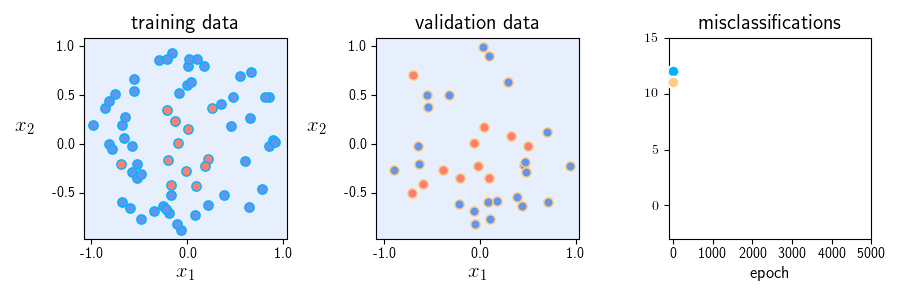
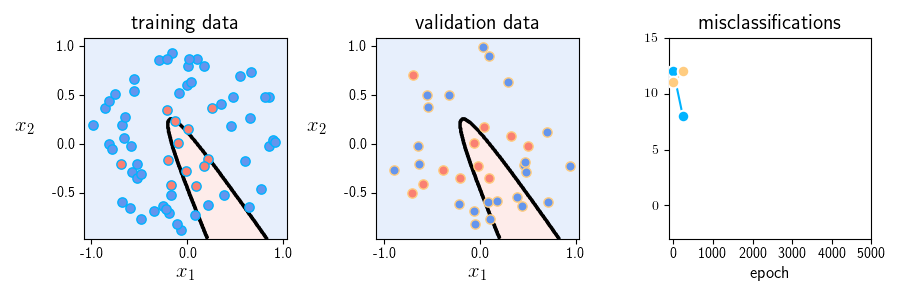
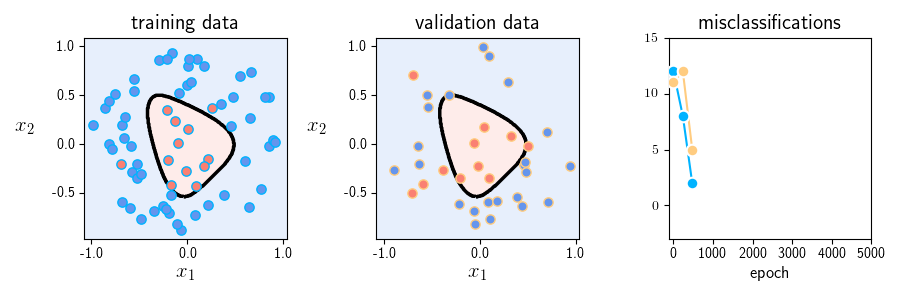
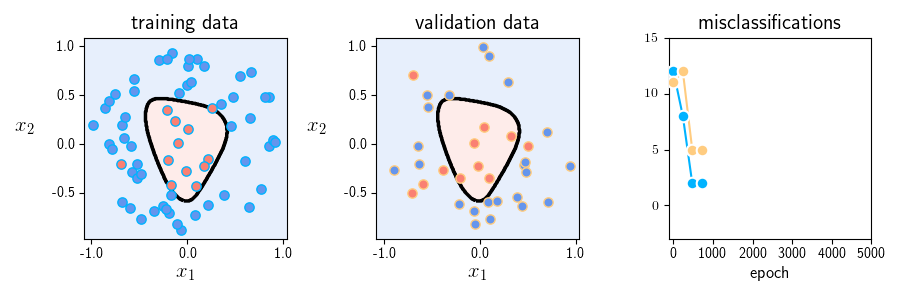
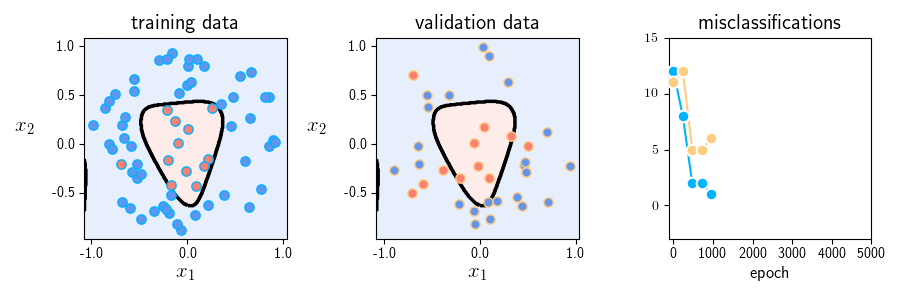
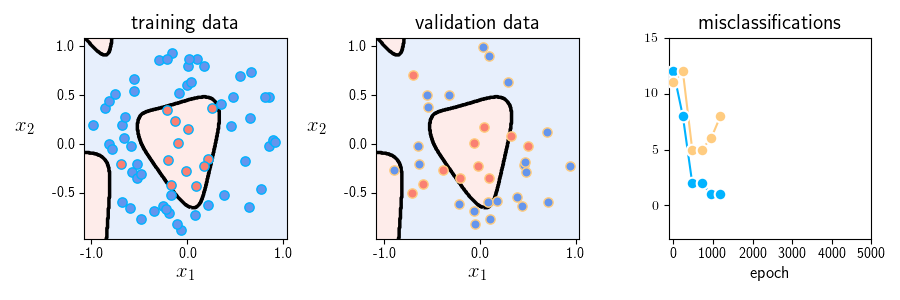
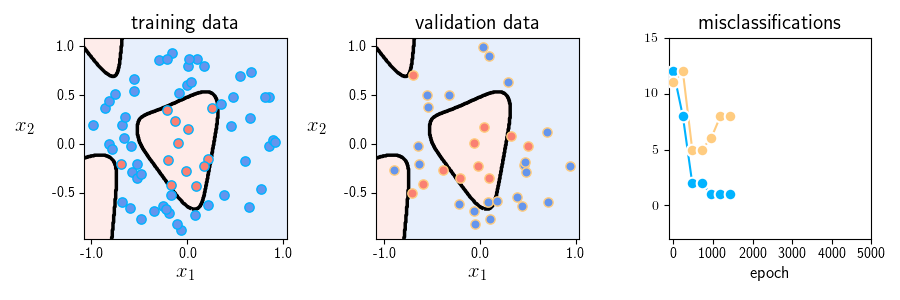
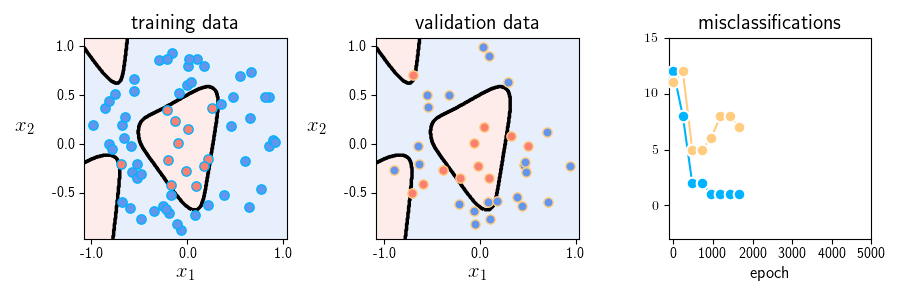
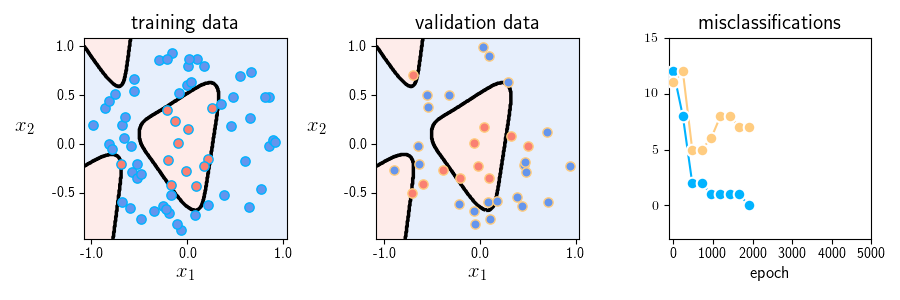
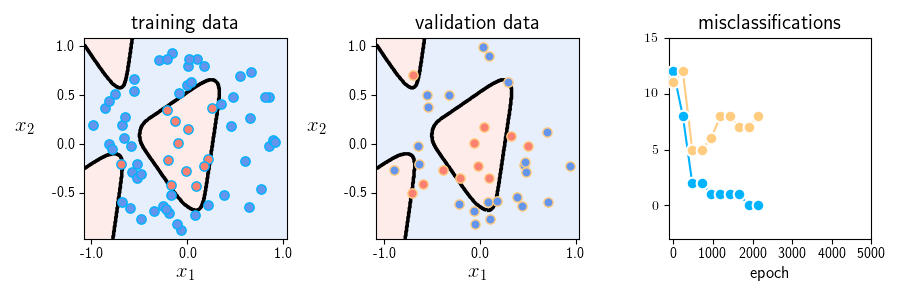
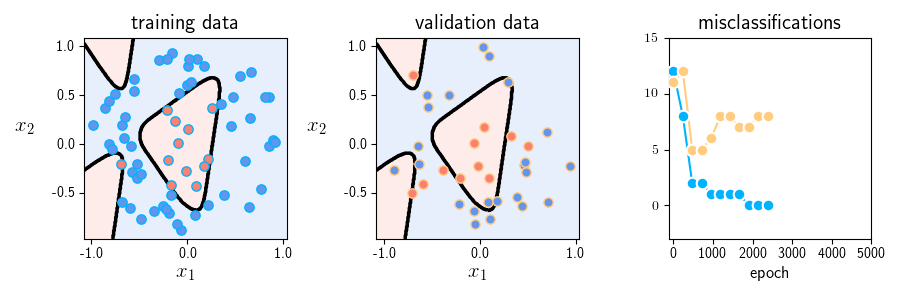
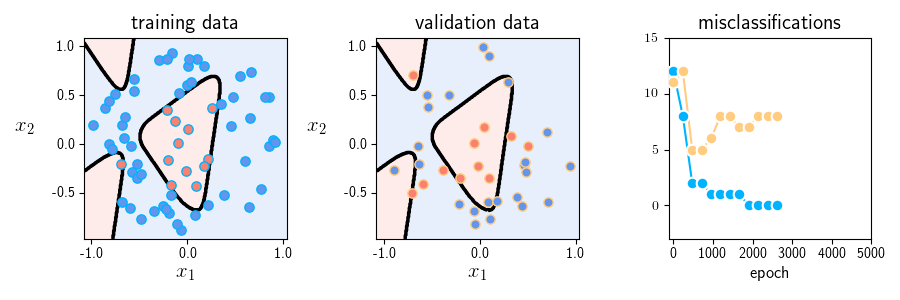
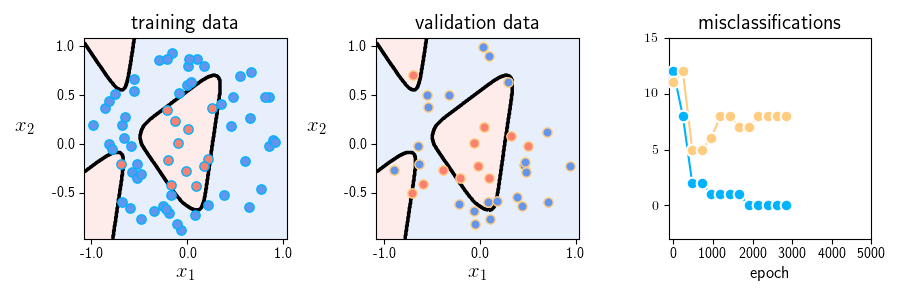
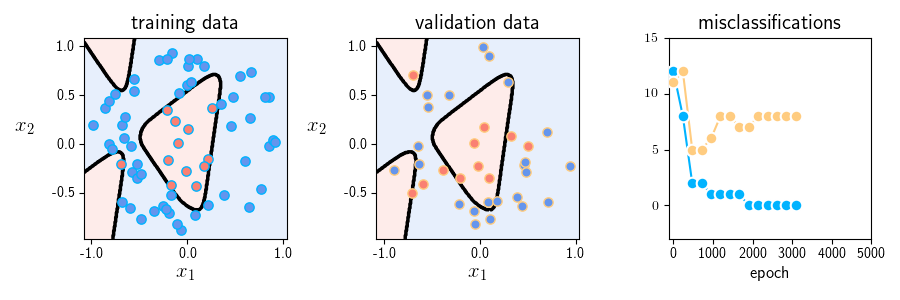
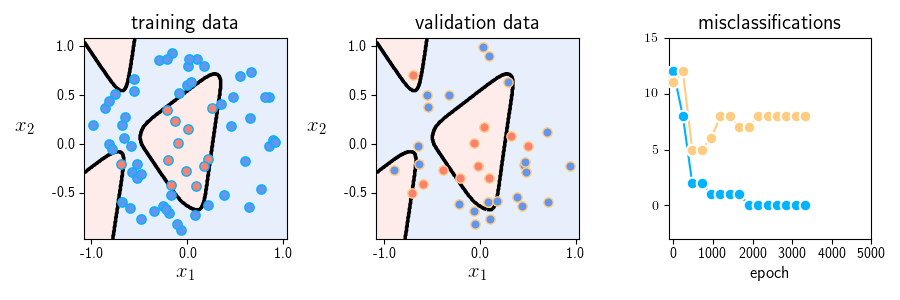
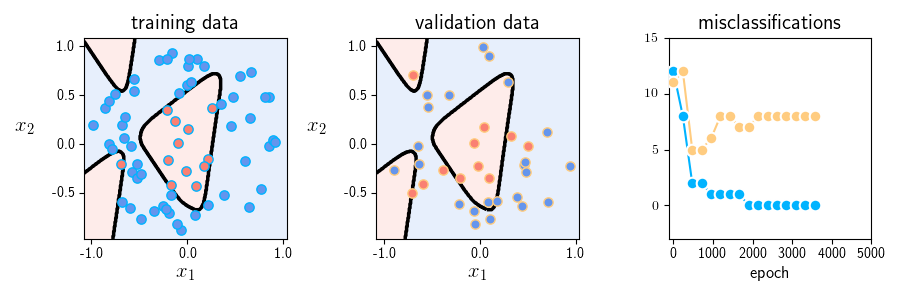
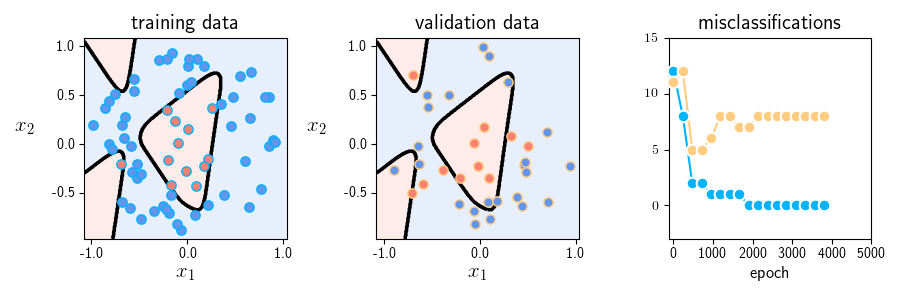
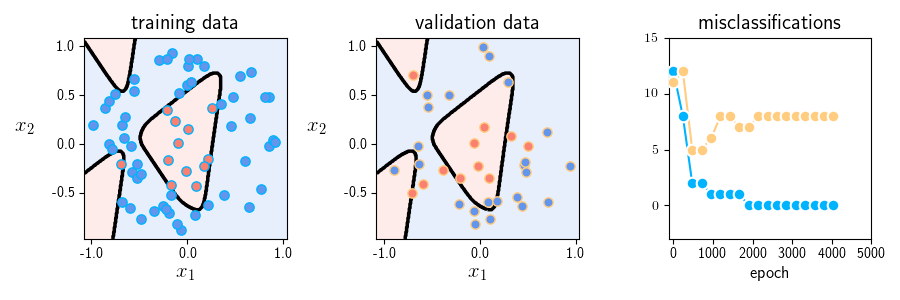
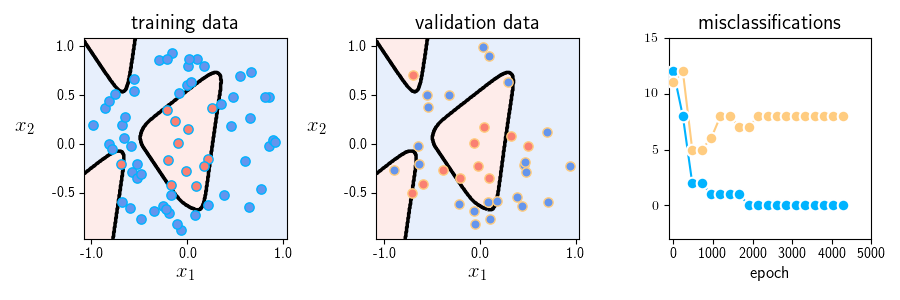
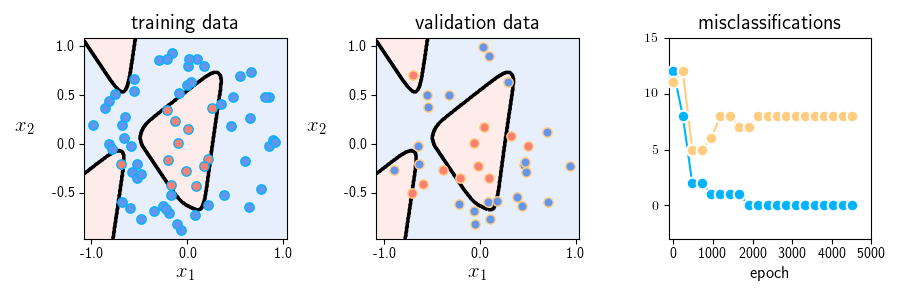
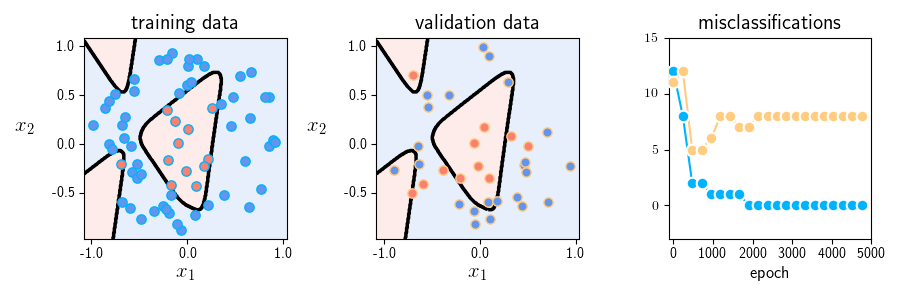

In [18]:
# load up animator
demo3 = nonlib.early_stop_classification_animator.Visualizer(csvname)

# animate based on the sample weight history
frames = 20
demo3.animate_trainval_earlystop(mylib1,frames)